# Experiments from the Deep Learning book by Chollet

Code can be also be found here: manning.com/books/deep-learning-with-python... Or apparently not.

In [1]:
import numpy as np
import cv2
from tensorflow.python.keras.datasets import imdb

/usr/local/lib/python3.6/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [3]:
train_data.shape

(25000,)

In [4]:
sample = train_data[0]
sample

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

Confirming that the highest index of words is 9999 since we only kept the first 10.000 words

In [5]:
max([max(sequence) for sequence in train_data])

9999

In [32]:
word_index = imdb.get_word_index()
word_index
word_index['the']

1

In [7]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
reverse_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

In [8]:
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
                       
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.array(train_labels).astype('float32')
y_test = np.array(test_labels).astype('float32')

x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [10]:
from tensorflow.python.keras import models, layers

In [11]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

W1008 18:14:12.225883 140706055296768 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 212us/sample - loss: 0.5197 - accuracy: 0.7835 - val_loss: 0.4010 - val_accuracy: 0.8542
Epoch 2/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.3065 - accuracy: 0.9032 - val_loss: 0.3062 - val_accuracy: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 102us/sample - loss: 0.2216 - accuracy: 0.9273 - val_loss: 0.2769 - val_accuracy: 0.8913
Epoch 4/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.1730 - accuracy: 0.9429 - val_loss: 0.2758 - val_accuracy: 0.8893
Epoch 5/20
15000/15000 [==============================] - 2s 103us/sample - loss: 0.1372 - accuracy: 0.9564 - val_loss: 0.2821 - val_accuracy: 0.8870
Epoch 6/20
15000/15000 [==============================] - 2s 104us/sample - loss: 0.1135 - accuracy: 0.9656 - val_loss: 0.2943 - val_accuracy: 0.8859
Epoch 7/20
15000/15000 [==========================

In [12]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [13]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<Figure size 640x480 with 1 Axes>

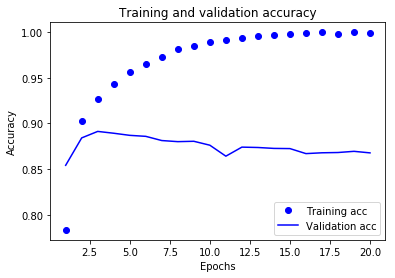

In [14]:
plt.clf()
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Here we saw overfitting!
Summary: Input are 15.000 sequences of a few hundred words. One sequences is encoded as [0,1,0,0,1,...] where each bit is on if a certain word is in the given dictionary, regarding its index in the dictionary.
We are supposed to learn 1 or 0 for positive or negative review. We overfit after 4 epochs.
Let's try it again!

In [15]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(partial_x_train, partial_y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)


Train on 15000 samples
Epoch 1/4
15000/15000 [==============================] - 1s 75us/sample - loss: 0.5379 - accuracy: 0.7795
Epoch 2/4
15000/15000 [==============================] - 1s 62us/sample - loss: 0.3374 - accuracy: 0.8983
Epoch 3/4
15000/15000 [==============================] - 1s 62us/sample - loss: 0.2466 - accuracy: 0.9218
Epoch 4/4
25000/25000 [==============================] - 2s 91us/sample - loss: 0.3125 - accuracy: 0.8710


In [16]:
results

[0.31249600901603697, 0.871]

In [17]:
print(x_test.shape)
model.predict(x_test)

(25000, 10000)


array([[0.23192689],
       [0.9950441 ],
       [0.79685616],
       ...,
       [0.07032841],
       [0.12562177],
       [0.43547702]], dtype=float32)

In [48]:
so_good = "amzing cool good perfect top recommend best jokes laugh action I movie love loved better hilarious actor acting director"
positive = "I loved the movie The acting was amazing and the jokes made me laugh a lot so good amazing cool perfect"
negative = "Fucking stupid movie bad bad annoying boring They didn't know how to act and it seemed quite unrealistic Hope that they will not produce a second one"
neutral = "I loved and hated this movie at the same time I like the provocative message but felt that some characters stayed shallow"

def encode(reviews):
    sequences = []
    for review in reviews:
        review = review.lower()
        review = review.split(" ")
        sequence = [1]
        for word in review:
            code = word_index.get(word, -1)
            if code != -1:
                code += 3
            if code == -1:
                code = 2
            if code > 9999:
                code = 2
            print(word)
            print(code)
            sequence.append(code)
        sequences.append(sequence)
    return sequences

encoded_reviews = encode([so_good, positive, neutral, negative])
encoded_reviews

amzing
2
cool
646
good
52
perfect
404
top
350
recommend
386
best
118
jokes
640
laugh
462
action
206
i
13
movie
20
love
119
loved
447
better
128
hilarious
642
actor
284
acting
116
director
167
i
13
loved
447
the
4
movie
20
the
4
acting
116
was
16
amazing
480
and
5
the
4
jokes
640
made
93
me
72
laugh
462
a
6
lot
176
so
38
good
52
amazing
480
cool
646
perfect
404
i
13
loved
447
and
5
hated
1800
this
14
movie
20
at
33
the
4
same
172
time
58
i
13
like
40
the
4
provocative
5423
message
749
but
21
felt
421
that
15
some
49
characters
105
stayed
2674
shallow
2012
fucking
2
stupid
379
movie
20
bad
78
bad
78
annoying
616
boring
357
they
36
didn't
161
know
124
how
89
to
8
act
511
and
5
it
12
seemed
468
quite
179
unrealistic
2270
hope
440
that
15
they
36
will
80
not
24
produce
2242
a
6
second
333
one
31


[[1,
  2,
  646,
  52,
  404,
  350,
  386,
  118,
  640,
  462,
  206,
  13,
  20,
  119,
  447,
  128,
  642,
  284,
  116,
  167],
 [1,
  13,
  447,
  4,
  20,
  4,
  116,
  16,
  480,
  5,
  4,
  640,
  93,
  72,
  462,
  6,
  176,
  38,
  52,
  480,
  646,
  404],
 [1,
  13,
  447,
  5,
  1800,
  14,
  20,
  33,
  4,
  172,
  58,
  13,
  40,
  4,
  5423,
  749,
  21,
  421,
  15,
  49,
  105,
  2674,
  2012],
 [1,
  2,
  379,
  20,
  78,
  78,
  616,
  357,
  36,
  161,
  124,
  89,
  8,
  511,
  5,
  12,
  468,
  179,
  2270,
  440,
  15,
  36,
  80,
  24,
  2242,
  6,
  333,
  31]]

In [49]:
vectorized_reviews = vectorize_sequences(encoded_reviews)
model.predict(vectorized_reviews)

array([[0.7768079 ],
       [0.75361836],
       [0.49708423],
       [0.09954068]], dtype=float32)